In [107]:
import pandas as pd 
import matplotlib as pyplot
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [108]:
data_store = pd.read_csv(r'googleplaystore.csv')

In [109]:
data_store.shape

(10841, 13)

In [110]:
#check any duplicated
data_store.duplicated().any()

True

In [111]:
#delete all duplicates
data_store.drop_duplicates(inplace=True)

In [112]:
#check any specific duplicated in 'App'
data_store['App'].duplicated().any()

True

In [113]:
#delete all duplicates in 'App'
data_store.drop_duplicates(subset=['App'],inplace=True)

In [114]:
data_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
#delete last 3 columns 
data_store.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [116]:
#check any nan value
data_store.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
dtype: bool

In [117]:
#check nan value count
data_store['Rating'].isna().value_counts()

Rating
False    8197
True     1463
Name: count, dtype: int64

In [118]:
#check data for see who is nan
data_store.loc[data_store['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business


In [119]:
# see statistic 
data_store['Rating'].describe()

count    8197.000000
mean        4.175052
std         0.561026
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [120]:
#sort value 
data_store['Rating'].sort_values(ascending=False)

10472    19.0
8327      5.0
9503      5.0
7164      5.0
9444      5.0
         ... 
10824     NaN
10825     NaN
10831     NaN
10835     NaN
10838     NaN
Name: Rating, Length: 9660, dtype: float64

In [121]:
#delete specific row becauce meaningless value
data_store.drop(index=10472,inplace=True)

In [122]:
#change nan value to 4.3 (median)
data_store['Rating'].fillna(value=4.3,inplace=True)

In [123]:
data_store['Rating'].describe()

count    9659.000000
mean        4.192442
std         0.496397
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [124]:
data_store['Reviews'] = data_store['Reviews'].astype(int)

In [125]:
#delete rows if value less than 1 (0 Reviews too less)
data_store.drop(index=data_store[data_store['Reviews'] < 1].index,axis=0,inplace=True)

In [126]:
#clean data and change type
data_store['Installs'] = data_store['Installs'].str.replace(',',"").str.replace('+',"")
data_store['Installs'] = data_store['Installs'].astype(float)

In [127]:
#clean data and change type
data_store['Price'] = data_store['Price'].str.replace('$',"")
data_store['Price'] = data_store['Price'].astype(float)

In [128]:
data_store.sort_values('Price',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000.0,Paid,399.99,Everyone,Entertainment
5369,I am Rich,FINANCE,4.3,180,3.8M,5000.0,Paid,399.99,Everyone,Finance
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle
...,...,...,...,...,...,...,...,...,...,...
3866,"Dynavix - Navigation, Maps, Traffic data & Cam...",MAPS_AND_NAVIGATION,4.2,1688,Varies with device,50000.0,Free,0.00,Everyone,Maps & Navigation
3865,Moovit: Bus Time & Train Time Live Info,MAPS_AND_NAVIGATION,4.4,617477,Varies with device,10000000.0,Free,0.00,Everyone,Maps & Navigation
3864,hum app,MAPS_AND_NAVIGATION,4.4,10218,78M,1000000.0,Free,0.00,Everyone,Maps & Navigation
3863,NAVITIME Bus Transit JAPAN,MAPS_AND_NAVIGATION,3.7,6939,Varies with device,1000000.0,Free,0.00,Everyone,Maps & Navigation


In [129]:
#clean data if price more than 100 $ 
data_store.drop(index=data_store.loc[data_store['Price']>100].index,inplace=True)

In [130]:
data_store.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1514,Public Digital Library,LIBRARIES_AND_DEMO,3.9,2087,Varies with device,50000.0,Free,0.0,Everyone,Libraries & Demo
310,Comic Es - Shojo manga / love comics free of c...,COMICS,3.9,2181,10M,100000.0,Free,0.0,Teen,Comics
3817,BaconReader for Reddit,NEWS_AND_MAGAZINES,4.5,103074,Varies with device,1000000.0,Free,0.0,Mature 17+,News & Magazines
7821,CS Guns Shoot,FAMILY,3.7,433,Varies with device,50000.0,Free,0.0,Teen,Entertainment
6699,Cube BR LWP simple,PERSONALIZATION,4.3,19,206k,1000.0,Free,0.0,Everyone,Personalization


In [131]:
data_store.sort_index(inplace=True)

In [132]:
data_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity


In [133]:
#for see price graph data 
price_data = data_store[['Price','App']].groupby('Price',as_index=False).count().sort_values('App',ascending=False).head(20)

In [134]:
#clean price zero row
price_data.drop(index=0,inplace=True)

In [135]:
price_data.head()

,Price,App
1,0.99,123
23,2.99,117
41,4.99,69
14,1.99,67
32,3.99,55


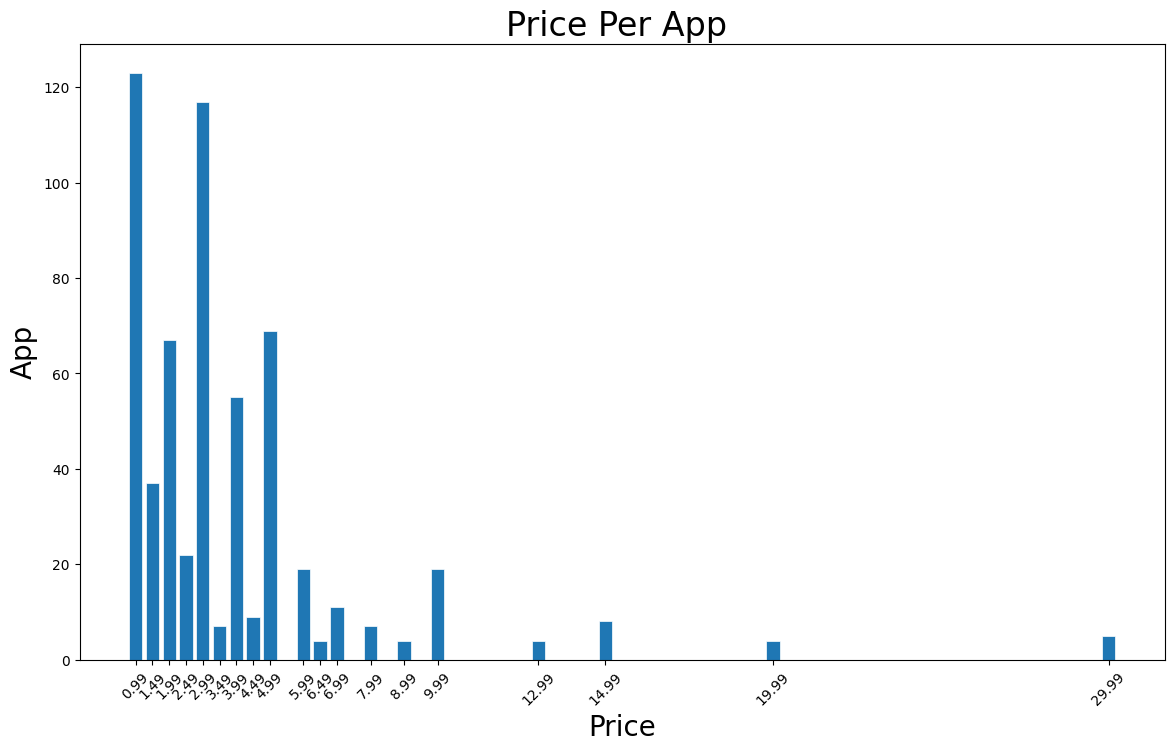

In [136]:
#using bar plot for visualization data
x = price_data['Price']
y = price_data['App']

fig = plt.figure(figsize=(14,8))

plt.bar(x=x,height=y,edgecolor="white", linewidth=0.5,width=0.4)
plt.xticks(x,rotation=45)

plt.title('Price Per App ',fontsize=24)
plt.xlabel('Price',fontsize=20)
plt.ylabel('App',fontsize=20)

plt.show()

In [137]:
data_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity


In [138]:
# how many paid app 
data_store.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
Type,,,,,,,,,
Free,8386,8386,8386,8386,8386,8386,8386,8386,8386
Paid,665,665,665,665,665,665,665,665,665


In [139]:
#number of app by category
cat_app = data_store[['Category','App']].groupby(['Category'],as_index=False).count()

In [140]:
cat_app.sort_values('App',inplace=True,ascending=False)

In [141]:
cat_app.tail()

,Category,App
0,ART_AND_DESIGN,63
22,PARENTING,60
10,EVENTS,58
5,COMICS,56
2,BEAUTY,51


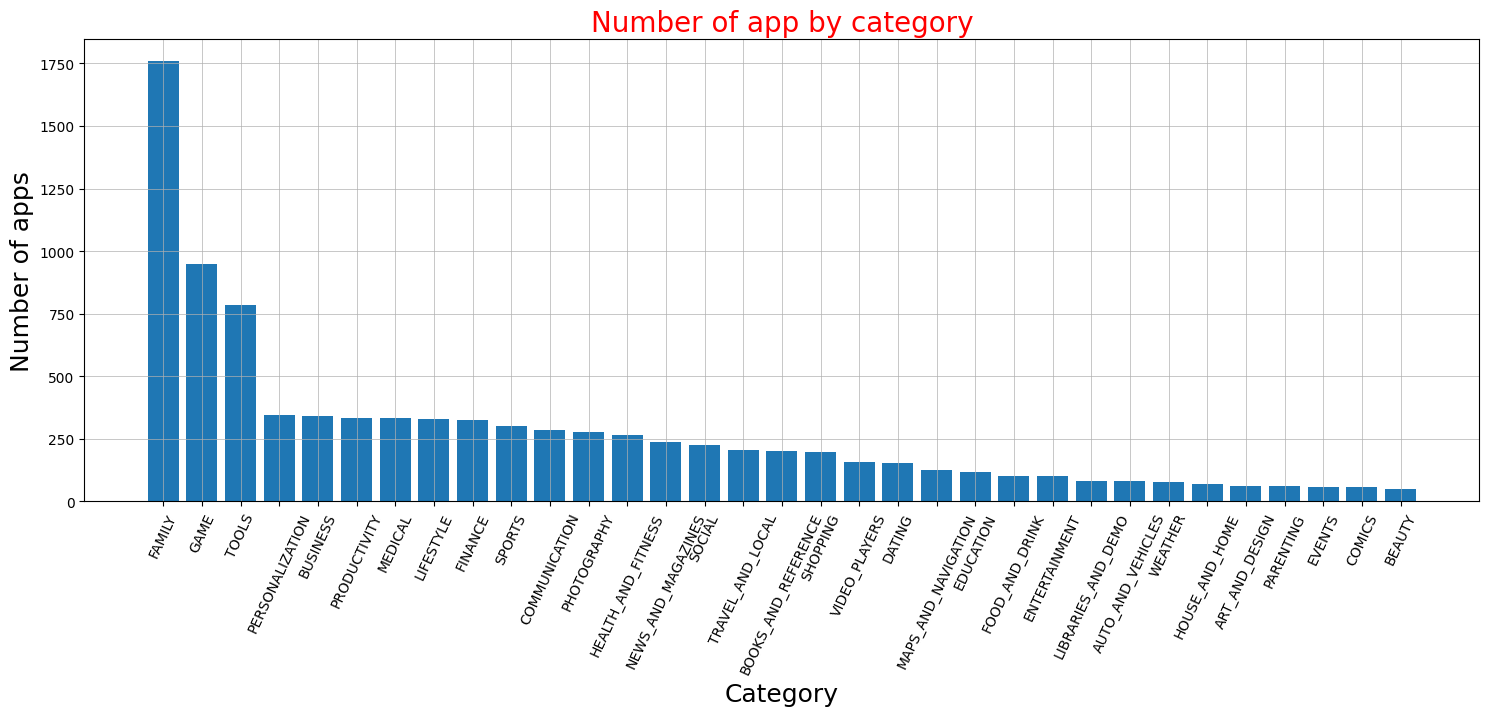

In [142]:
plt.figure(figsize=(18,6))
plt.grid(linewidth=0.5)
plt.bar(x=cat_app['Category'],height=cat_app['App'])
plt.title('Number of app by category',fontsize=20,color='red')
plt.xlabel('Category',fontsize=18)
plt.ylabel('Number of apps',fontsize=18)
plt.xticks(rotation=65)

plt.show()

In [143]:
#rating mean by category 
rat_category = data_store[['Category','Rating']].groupby(['Category'],as_index=False).mean()

In [144]:
rat_category.sort_values('Rating',ascending=False,inplace=True)

In [145]:
# installs sum by category
ins_cat = data_store[['Category','Installs']].groupby('Category',as_index=False).sum()
ins_cat.sort_values('Installs',ascending=False,inplace=True)

In [146]:
ins_cat.describe()

,Installs
count,3.300000e+01
mean,2.276433e+09
std,3.342017e+09
min,1.597302e+07
25%,1.143381e+08
50%,6.971611e+08
75%,2.894886e+09
max,1.387887e+10


In [147]:
ins_cat.head()

,Category,Installs
14,GAME,1.387887e+10
6,COMMUNICATION,1.103827e+10
29,TOOLS,8.001764e+09
25,PRODUCTIVITY,5.793079e+09
27,SOCIAL,5.487867e+09


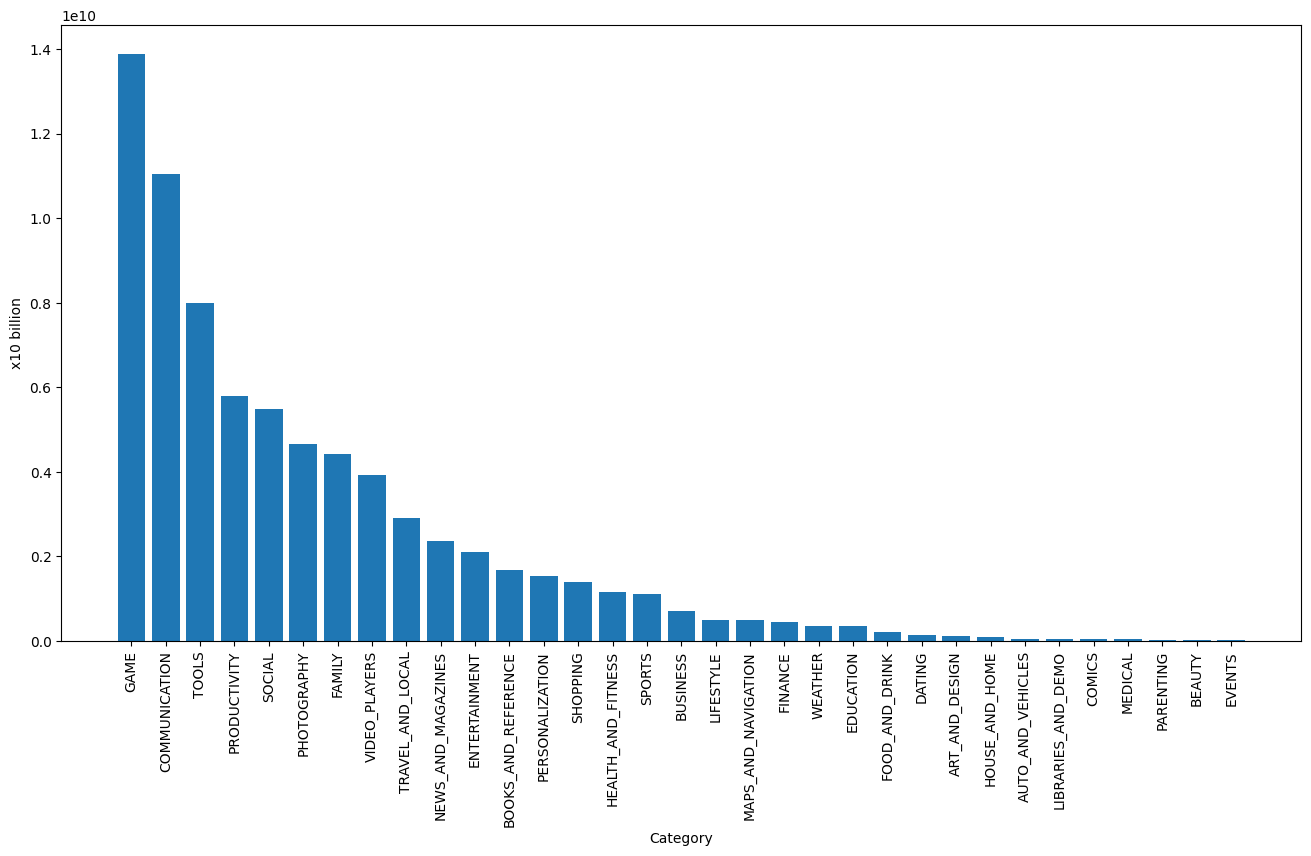

In [148]:
plt.figure(figsize=(16,8))
plt.bar(x=ins_cat['Category'],height=ins_cat['Installs'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('x10 billion')

#plt.yscale('log')
#plt.ylim(1000,1000000000)

plt.show()

In [149]:
# fee distribution graph
fee_chart = data_store[['Type','App']].groupby('Type',as_index=False).count()


In [150]:
fee_chart

,Type,App
0,Free,8386
1,Paid,665


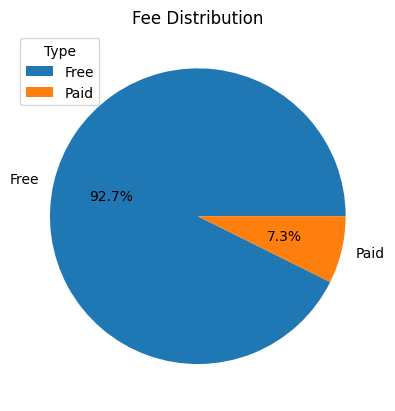

In [151]:
fig , pie_graph = plt.subplots()

pie_graph.pie(x=fee_chart['App'],labels=fee_chart['Type'], autopct='%1.1f%%')



plt.title('Fee Distribution')

plt.legend(title='Type')

plt.show()

In [152]:
data_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity


In [153]:
# between installs and reviews relation
ins_rew_scatter = data_store[['Category','App','Reviews','Installs','Rating']]

In [154]:
colors_cat = ins_rew_scatter.groupby('Category',as_index=False).count()

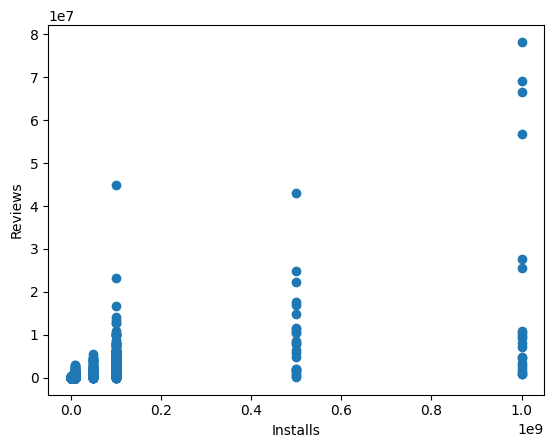

In [155]:
plt.scatter(data=ins_rew_scatter,
            x='Installs',
            y='Reviews')


plt.xlabel('Installs')
plt.ylabel('Reviews')

plt.show()

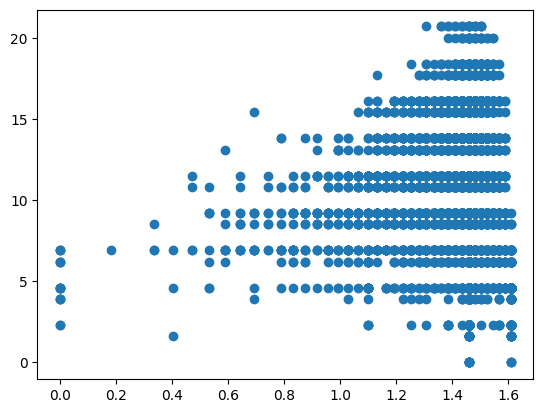

In [156]:

log_data = data_store[['Rating','Installs']].apply(np.log)

plt.scatter(data=log_data,
            x='Rating',
            y='Installs',)
plt.show()

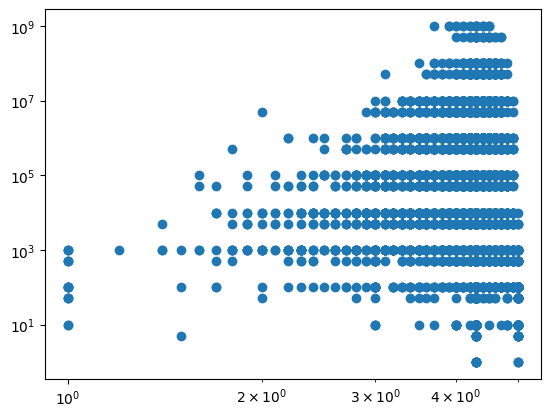

In [157]:
plt.scatter(data=data_store,
            x='Rating',
            y='Installs',)
plt.yscale('log')
plt.xscale('log')
plt.show()